<a href="https://colab.research.google.com/github/vxbrin/DataScience3/blob/main/Desarrollo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar el file

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Try reading the CSV and skipping bad lines
try:
    films = pd.read_csv('/content/drive/My Drive/films.csv', on_bad_lines='skip')
    print(films.head())
except Exception as e:
    print(f"Error reading CSV with skipped bad lines: {e}")
    print("Could not read the CSV file. Please check the file format and content.")

Mounted at /content/drive
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [2]:
# Separar en columnas

import pandas as pd
films = pd.read_csv('/content/drive/My Drive/films.csv', sep='\|\|', engine='python')
print(films.head().to_markdown())

|    | film_name             | gender   | film_avg_rate   |   review_rate | review_title                                          | review_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

## Análisis de Sentimiento de los comentarios

In [8]:
# Análisis de sentimineto

!pip install nltk pandas scikit-learn
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Download VADER lexicon
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except nltk.downloader.DownloadError:
    nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    if isinstance(text, str):
        scores = analyzer.polarity_scores(text)
        # Return the compound score as a measure of overall sentiment
        return scores['compound']
    else:
        return 0  # Handle non-string inputs

# Apply sentiment analysis to the 'review text' column
films['sentiment_score'] = films['review_text'].apply(get_sentiment_score)

# Categorize sentiment based on the compound score
# You can adjust these thresholds based on your needs
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

films['sentiment_category'] = films['sentiment_score'].apply(categorize_sentiment)

# Display sentiment analysis results by gender and film name
sentiment_by_gender_film = films.groupby(['gender', 'film_name', 'sentiment_category']).size().unstack(fill_value=0)

print("\nSentiment Analysis Results by Gender and Film Name:")
print(sentiment_by_gender_film.to_markdown())

# average sentiment score
average_sentiment_by_gender_film = films.groupby(['gender', 'film_name'])['sentiment_score'].mean().reset_index()

print("\nAverage Sentiment Score by Gender and Film Name:")
print(average_sentiment_by_gender_film.to_markdown())



Sentiment Analysis Results by Gender and Film Name:
|                                                        |   Negative |   Neutral |   Positive |
|:-------------------------------------------------------|-----------:|----------:|-----------:|
| ('Animación', 'Atrapa la bandera')                     |         42 |         3 |          6 |
| ('Animación', 'Las aventuras de Tadeo Jones')          |         74 |         8 |         12 |
| ('Animación', 'Planet 51')                             |         79 |         9 |         15 |
| ('Animación', 'Tadeo Jones 2')                         |         18 |         4 |         14 |
| ('Aventuras', 'Alatriste')                             |        376 |        21 |         48 |
| ('Aventuras', 'Ágora')                                 |        401 |        16 |         77 |
| ('Cine negro', 'La isla mínima')                       |        315 |        21 |         83 |
| ('Comedia', 'Ahora o nunca')                           |         63 |   

In [10]:
# Sentiment score mas positivo y mas negativo

# Encontrar la reseña con el puntaje de sentimiento más positivo
most_positive_review = films.loc[films['sentiment_score'].idxmax()]

# Encontrar la reseña con el puntaje de sentimiento más negativo
most_negative_review = films.loc[films['sentiment_score'].idxmin()]

print("\nReseña con el puntaje de sentimiento más positivo:")
print(f"  Película: {most_positive_review['film_name']}")
print(f"  Texto de la Reseña: {most_positive_review['review_text']}")
print(f"  Puntaje de Sentimiento: {most_positive_review['sentiment_score']}")
print(f"  Categoría de Sentimiento: {most_positive_review['sentiment_category']}")

print("\nReseña con el puntaje de sentimiento más negativo:")
print(f"  Película: {most_negative_review['film_name']}")
print(f"  Texto de la Reseña: {most_negative_review['review_text']}")
print(f"  Puntaje de Sentimiento: {most_negative_review['sentiment_score']}")
print(f"  Categoría de Sentimiento: {most_negative_review['sentiment_category']}")


Reseña con el puntaje de sentimiento más positivo:
  Película: Ágora
  Texto de la Reseña: Amenábar nos lleva a la Alejandría decandete del siglo IV. Allí, Hypatia, una joven filósofa y astrónoma, da clases magistrales a sus alumnos, jóvenes de clase alta. Entre ellos, se encuentra Orestes, un joven pagano e inconformista que siente amor por su maestra. El mismo amor que siente Davo, su esclavo, por ella.Esa historia de amores entrelazados, se ve cerrada por un amor inmenso, el amor más grande de todos. El amor de Hypatia por el saber, por el conocimiento. Hypatia entregará su vida y devoción a la filosofía y astronomía, impidiendo así el amor carnal.Sin embargo, esta historia de amores cruzados se verá perturbada por un contexto nada lúgubre en comparación con lo que se avecinaba en siglos posteriores. El cristianismo acaba de salir a la luz. Sus creyentes ya no son perseguidos ni crucificados. Ahora, en la Alejandría romana, conviven los cultos paganos con el cristianismo y el judaí

In [13]:
# Resumen del sentiment score de ágora

agora_reviews = films[films['film_name'].str.contains('ágora', case=False, na=False)]

# Calcular un resumen del sentiment score para 'ágora'
if not agora_reviews.empty:
    agora_sentiment_summary = agora_reviews['sentiment_score'].describe()
    print("\nResumen del Sentiment Score para 'ágora':")
    print(agora_sentiment_summary.to_markdown())

    # Contar el número de reseñas por categoría de sentimiento para 'ágora'
    agora_sentiment_counts = agora_reviews['sentiment_category'].value_counts()
    print("\nConteo de Reseñas por Categoría de Sentimiento para 'ágora':")
    print(agora_sentiment_counts.to_markdown())
else:
    print("\nNo se encontraron reseñas para la película 'ágora'.")


Resumen del Sentiment Score para 'ágora':
|       |   sentiment_score |
|:------|------------------:|
| count |        494        |
| mean  |         -0.508996 |
| std   |          0.483594 |
| min   |         -0.9965   |
| 25%   |         -0.886    |
| 50%   |         -0.6808   |
| 75%   |         -0.296    |
| max   |          0.9829   |

Conteo de Reseñas por Categoría de Sentimiento para 'ágora':
| sentiment_category   |   count |
|:---------------------|--------:|
| Negative             |     401 |
| Positive             |      77 |
| Neutral              |      16 |


In [15]:
# Género más positivo y negativo

# Encontrar el promedio de sentiment score por género
average_sentiment_by_gender = films.groupby('gender')['sentiment_score'].mean().reset_index()

# Identificar el género con el promedio de sentiment score más positivo
most_positive_gender = average_sentiment_by_gender.loc[average_sentiment_by_gender['sentiment_score'].idxmax()]

# Identificar el género con el promedio de sentiment score más negativo
most_negative_gender = average_sentiment_by_gender.loc[average_sentiment_by_gender['sentiment_score'].idxmin()]

print("\nGénero con el promedio de puntaje de sentimiento más positivo:")
print(f"  Género: {most_positive_gender['gender']}")
print(f"  Promedio de Puntaje de Sentimiento: {most_positive_gender['sentiment_score']}")

print("\nGénero con el promedio de puntaje de sentimiento más negativo:")
print(f"  Género: {most_negative_gender['gender']}")
print(f"  Promedio de Puntaje de Sentimiento: {most_negative_gender['sentiment_score']}")


Género con el promedio de puntaje de sentimiento más positivo:
  Género: Musical
  Promedio de Puntaje de Sentimiento: -0.3641061538461538

Género con el promedio de puntaje de sentimiento más negativo:
  Género: Terror
  Promedio de Puntaje de Sentimiento: -0.6268143464399575


## Compración con la calificación otorgada

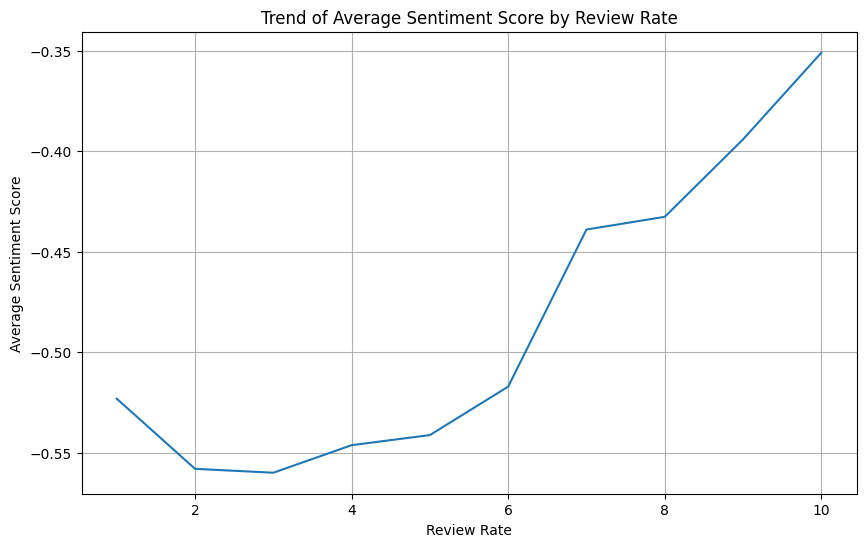

In [24]:
# Comparar la calificacion otorgada con el analisis de sentimiento de los comentarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'review_rate' is numeric, handling potential errors
films['review_rate'] = pd.to_numeric(films['review_rate'], errors='coerce')

# Drop rows where 'review_rate' or 'sentiment_score' are NaN (resulting from coercion or missing values)
films_cleaned = films.dropna(subset=['review_rate', 'sentiment_score']).copy()

# Group by 'review_rate' and calculate the mean of 'sentiment_score'
average_sentiment_by_rate = films_cleaned.groupby('review_rate')['sentiment_score'].mean().reset_index()

# Create the trend chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_sentiment_by_rate, x='review_rate', y='sentiment_score')
plt.title('Trend of Average Sentiment Score by Review Rate')
plt.xlabel('Review Rate')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

## Conclusiones


Existe una correlación entre la calificación numérica otorgada y el tono del comentario. Esto sugiere que el análisis computacional del lenguaje puede ser una herramienta útil para complementar o validar las métricas de calificación explícitas, al igual que nos mostraba el análisis de deep learning.

Sin embargo, es importante destacar que esta correlación no es perfecta. Existen casos en los que el sentimiento del texto puede no coincidir completamente con la calificación numérica. Factores como el sarcasmo, la ironía o la complejidad del lenguaje en las reseñas pueden influir en los resultados del análisis de sentimiento automático. La exploración de las reseñas más positivas y negativas también revela la intensidad de las emociones que ciertas películas pueden evocar en la audiencia como la película Ágora, que tiene la mejor y peor reseña del conjunto.

